<a href="https://colab.research.google.com/github/gpdsec/DataScience-Python/blob/master/Beer_Review_ANN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline

In [2]:
# loading the dataset
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Input/rann_train.csv')
dataset.columns

Index(['review/appearance', 'review/aroma', 'review/overall', 'review/palate',
       'review/taste'],
      dtype='object')

In [3]:
features = ['review/appearance', 'review/aroma', 'review/palate',
       'review/taste']
X = dataset[features]
Y = dataset['review/overall']
X, x, Y, y = train_test_split(X,Y, test_size = 0.4)

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22500 entries, 7587 to 27545
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   review/appearance  22500 non-null  float64
 1   review/aroma       22500 non-null  float64
 2   review/palate      22500 non-null  float64
 3   review/taste       22500 non-null  float64
dtypes: float64(4)
memory usage: 878.9 KB


In [5]:
X.describe()

,review/appearance,review/aroma,review/palate,review/taste
count,22500.000000,22500.000000,22500.000000,22500.000000
mean,3.903578,3.874511,3.858800,3.926822
std,0.584785,0.680078,0.664893,0.713731
min,1.000000,1.000000,1.000000,1.000000
25%,3.500000,3.500000,3.500000,3.500000
50%,4.000000,4.000000,4.000000,4.000000
75%,4.500000,4.500000,4.500000,4.500000
max,5.000000,5.000000,5.000000,5.000000


In [6]:
# optimiser
opt = tf.keras.optimizers.Adam(0.01)

In [7]:
# Build the model
rann = Sequential()
# 1st Layer
rann.add(Dense(64, input_shape=(4,), activation='relu'))
# 2nd Layer
rann.add(Dense(16, activation='relu'))
# Output Layer
rann.add(Dense(1))
# Compile
rann.compile(optimizer=opt, loss='mse')
# summary
rann.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________


In [8]:
# fit

r = rann.fit(X, Y,
             batch_size = 64, 
             #validation_data =(x,y), 
             epochs=100, 
             shuffle = True)

Epoch 1/100
352/352 [==============================] - 1s 3ms/step - loss: 0.2422
Epoch 2/100
352/352 [==============================] - 1s 3ms/step - loss: 0.1744
Epoch 3/100
352/352 [==============================] - 1s 3ms/step - loss: 0.1788
Epoch 4/100
352/352 [==============================] - 1s 3ms/step - loss: 0.1767
Epoch 5/100
352/352 [==============================] - 1s 3ms/step - loss: 0.1751
Epoch 6/100
352/352 [==============================] - 1s 3ms/step - loss: 0.1725
Epoch 7/100
352/352 [==============================] - 1s 3ms/step - loss: 0.1765
Epoch 8/100
352/352 [==============================] - 1s 3ms/step - loss: 0.1727
Epoch 9/100
352/352 [==============================] - 1s 3ms/step - loss: 0.1752
Epoch 10/100
352/352 [==============================] - 1s 3ms/step - loss: 0.1757
Epoch 11/100
352/352 [==============================] - 1s 3ms/step - loss: 0.1729
Epoch 12/100
352/352 [==============================] - 1s 3ms/step - loss: 0.1748
Epoch 13/100


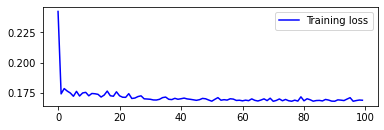

In [9]:
# Plot the loss

plt.subplot(211)
plt.plot(r.history['loss'], color='b', label="Training loss")
#plt.plot(r.history['val_loss'], color='r', label="validation loss")
plt.legend()


In [23]:
# prediction
y_pred = rann.predict(x)
mse = mean_squared_error(y, y_pred)
print(mse)

0.16685920401198415


In [33]:
List = []
for i in range(len(y_pred)):
  List.append(y_pred[i][0])


In [34]:
df = pd.DataFrame()
df["Y_Predictions"] = List
df["Y"] = y.to_list()
df.head(50)

,Y_Predictions,Y
0,4.586390,5.0
1,3.981476,4.5
2,4.670710,4.5
3,4.203067,4.0
4,4.324602,5.0
5,2.808635,2.5
6,3.636017,3.5
7,3.257906,4.0
8,4.022043,4.0
9,3.433716,3.5


In [35]:
df.describe()

,Y_Predictions,Y
count,15000.000000,15000.000000
mean,3.857377,3.882633
std,0.549057,0.703900
min,1.297182,0.000000
25%,3.638720,3.500000
50%,3.981476,4.000000
75%,4.203067,4.500000
max,4.748245,5.000000
